# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [15]:
# stundent details example: John S. 9812
# student details 1: Yuval G. 2889         
# student details 2: Maor S. 9780           
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: chat GPT
Goal:קבלת תמונת מצב ונתיב פעולה
Propmpt1:תציע לי מודלים שיעזור לי בהתאם למסד הנתונים הנתון
    
Propmpt2:תמליץ לי על ויזואליזציות ליתאימו לשאלות אותן בחרנו להציג
    
Propmpt3:


AI agent name 2:chat GPT
Goal:סדר ואירגון לאורך הקוד 
Propmpt1:תרשום לי את הקוד הזה בצורה טיפה יותר מסודרת וקריאה 
    
Propmpt2:תבדוק אם ההערות שהוספתי הם במקום והאם הן מספיקות
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
בעיית הלמידה שבה אנו עוסקים היא בעיית רגרסיה, שמטרתה לחזות את ערך הבית החציוני באזורים שונים בקליפורניה.
מאגר הנתונים כולל 20,640 דגימות, כאשר כל דוגמה מכילה 8 מאפיינים מספריים, המתארים מידע דמוגרפי וגאוגרפי כגון: הכנסה חציונית, גודל האוכלוסייה, מספר חדרים ממוצע, צפיפות דיור ומיקום גאוגרפי (Latitude ו־Longitude).
מטרתנו היא לאמן מודל חיזוי שיצליח לנבא את שווי הבית הצפוי בהתבסס על מאפיינים אלו, תוך שימוש בכלים של Feature Engineering, Cross-Validation ו־Grid Search לבחינת מספר מודלים והגדרות, במטרה לבחור את הפתרון המדויק והיעיל ביותר.


    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [16]:
import sys                    
import os                        
import pandas as pd
import numpy as np
import string
import math
import statistics
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sklearn


In [17]:
train_df = pd.read_csv('housing_train.csv')
test_df  = pd.read_csv('housing_test.csv')
print("This is the Train head:")
display(train_df.head())
print("This is the Test head:")
display(test_df.head())





This is the Train head:


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250

This is the Test head:


MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3  3.6429      28.0   5.249180   1.009836       848.0  2.780328     38.69   
4  2.7457      17.0  11.183267   2.107570       675.0  2.689243     38.88   

   Longitude  MedHouseVal  
0    -119.27        3.852  
1    -118.12        2.457  
2    -122.05        2.013  
3    -121.41        1.052  
4    -119.99        1.078

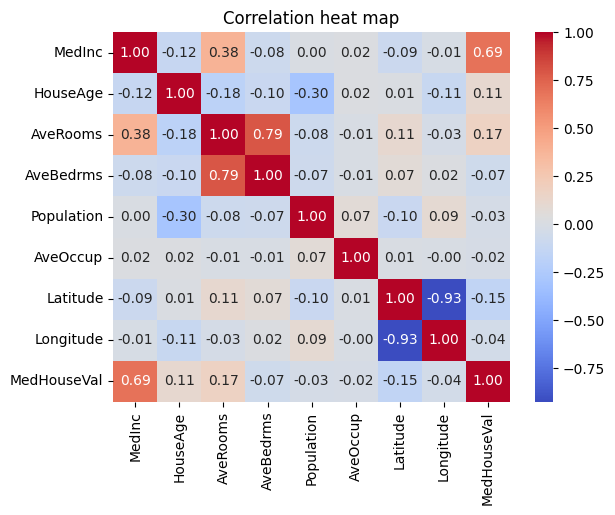

In [18]:
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation heat map')
plt.show()
#מטרה הטבלה היא הצגת הקשרים ביותר בין בנתונים

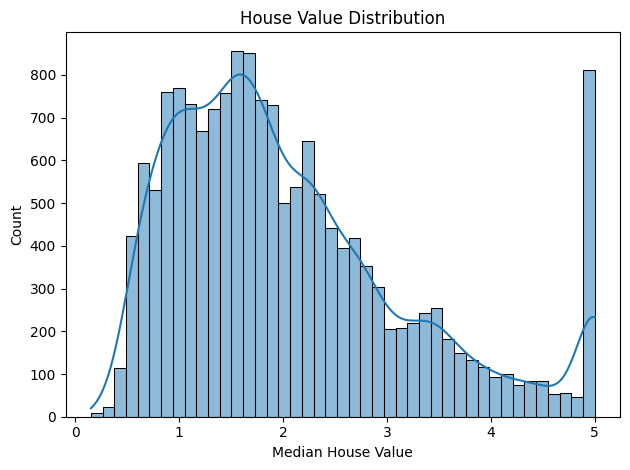

In [19]:
sns.histplot(data=train_df, x='MedHouseVal', kde=True)
plt.title('House Value Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
#הגרף מראה את התפלגות מחירי הדירות



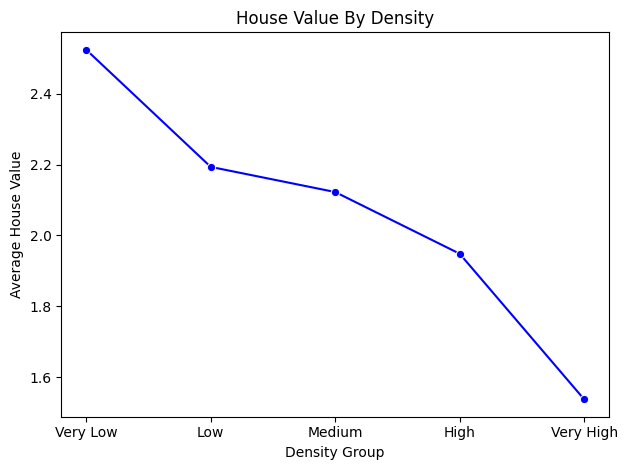

In [25]:
train_df['DensityGroup'] = pd.qcut(train_df['AveOccup'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# חישוב ממוצע ערך הדירה לכל קבוצת צפיפות
density_value_stats = train_df.groupby('DensityGroup', observed=False)['MedHouseVal'].mean().reset_index()
density_value_stats.rename(columns={'MedHouseVal': 'AvgHouseValue'}, inplace=True)

# גרף קווים של ממוצע ערך הדירה לפי קבוצות צפיפות
sns.lineplot(data=density_value_stats, x='DensityGroup', y='AvgHouseValue', marker='o', color='blue')
plt.title('House Value By Density')
plt.xlabel('Density Group')
plt.ylabel('Average House Value')
plt.tight_layout()
plt.show()
#מטרת הטבלה היא להציג את השפעת הצפיפות על מחירי הדיור

In [ ]:
train_df.describe()
#הצגה סטטיסטית פשוטה של כלל הנתונים כגון: ממצוצע , מנימום, מקסימום, וסטיית תקן

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.863517     28.650678      5.412479      1.093546   1424.287609   
std        1.878577     12.623994      2.088680      0.378594   1139.012630   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.564375     18.000000      4.448665      1.005988    789.000000   
50%        3.536650     29.000000      5.225511      1.048780   1167.000000   
75%        4.744375     37.000000      6.046629      1.099691   1722.000000   
max       15.000100     52.000000     62.422222     15.312500  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16512.000000  16512.000000  16512.000000  16512.000000  
mean       3.101201     35.631452   -119.566283      2.065267  
std       11.587773      2.137537      2.006552      1.151219  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.431070     33.930000   -121.800000      1.192000  
50%        2.816355     34.250000   -118.490000      1.796000  
75%        3.281612     37.710000   -118.000000      2.647000  
max     1243.333333     41.950000   -114.310000      5.000010

## Part 3 - Experiments
You could add as many code cells as needed

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

train_data = train_df.copy()
#נועד למניעת שינוי בטבלה המקורית 

#כלל המידע המקורי
base_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms','Population', 'AveOccup', 'Latitude', 'Longitude']
target = 'MedHouseVal'
X_original = train_data[base_features]
y = train_data[target]

#הערכים אותם הוספנו 
train_data['Loction'] = abs(train_data['Latitude']) + abs(train_data['Longitude'])
train_data['AreaDensity'] = train_data['Population'] / (train_data['AveOccup'] + 0.0001)
train_data['PeoplePerHouse'] = train_data['Population'] / (train_data['AveOccup'] + 0.0001)
train_data['PeoplePerRoom'] = train_data['AveRooms'] / (train_data['Population'] + 0.0001)

#יצירת סקייל לפיטצרים שהוספנו בהתאם גם לפיטצרס הבסיסיים
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_original)
engineered_features = base_features + ['AreaDensity', 'PeoplePerRoom', 'PeoplePerHouse', 'Loction']
X_engineerd = train_data[engineered_features]
X_engineerd_scaled = scaler.fit_transform(X_engineerd)

#הגרסאות השונות לפיטצרים 
feature_versions = {
    'original': X_original,
    'scaled': X_scale,
    'engineered_basic': X_engineerd,
    'engineered_scaled': X_engineerd_scaled
}

selected_models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        }
    },
    'KNN Regressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
}

results = []

#משום שהנתונים כבר עובדו ניתן להעביר אותם כבר ב פייפליין
for version_name, X in feature_versions.items():
    for model_name, model_info in selected_models.items():
        pipeline = Pipeline([
            ('prep', 'passthrough'),
            ('model', model_info['model'])
        ])

        # בניית גריד של פרמטרים
        param_grid = {f'model__{k}': v for k, v in model_info['params'].items()}

        
        grid = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=5,
            scoring=make_scorer(r2_score),
            n_jobs=-1
        )

        grid.fit(X, y)

        # שמירת התוצאות לתוך הרשימה שלנו
        results.append({
            'Feature Version': version_name,
            'Model': model_name,
            'Best Params': grid.best_params_,
            'R^2 Score (CV)': grid.best_score_
        })

# הפיכת התוצאות לטבלה שנוכל להציג לבסוף
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R^2 Score (CV)', ascending=False).reset_index(drop=True)

# הצגה
display(results_df)



Feature Version              Model  \
0   engineered_scaled  Gradient Boosting   
1    engineered_basic  Gradient Boosting   
2              scaled  Gradient Boosting   
3            original  Gradient Boosting   
4   engineered_scaled      Random Forest   
5    engineered_basic      Random Forest   
6              scaled      Random Forest   
7            original      Random Forest   
8   engineered_scaled      KNN Regressor   
9              scaled      KNN Regressor   
10   engineered_basic  Linear Regression   
11  engineered_scaled  Linear Regression   
12             scaled  Linear Regression   
13           original  Linear Regression   
14           original      KNN Regressor   
15   engineered_basic      KNN Regressor   

                                          Best Params  R^2 Score (CV)  
0   {'model__learning_rate': 0.1, 'model__max_dept...        0.819469  
1   {'model__learning_rate': 0.1, 'model__max_dept...        0.819108  
2   {'model__learning_rate': 0.1, 'model__max_dept...        0.815204  
3   {'model__learning_rate': 0.1, 'model__max_dept...        0.815133  
4   {'model__max_depth': 10, 'model__n_estimators'...        0.777249  
5   {'model__max_depth': 10, 'model__n_estimators'...        0.777191  
6   {'model__max_depth': 10, 'model__n_estimators'...        0.774274  
7   {'model__max_depth': 10, 'model__n_estimators'...        0.774209  
8   {'model__n_neighbors': 7, 'model__weights': 'd...        0.713013  
9   {'model__n_neighbors': 7, 'model__weights': 'd...        0.679697  
10                     {'model__fit_intercept': True}        0.632599  
11                     {'model__fit_intercept': True}        0.632599  
12                     {'model__fit_intercept': True}        0.604824  
13                     {'model__fit_intercept': True}        0.604824  
14  {'model__n_neighbors': 7, 'model__weights': 'd...        0.152380  
15  {'model__n_neighbors': 7, 'model__weights': 'd...        0.048964

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [24]:
#הפיצרים והמודל שהביאו לנו את התוצאה הטובה ביותר ביחד עם ההיפרפרמטרים הטובים ביותר
#Feature Version: engineered_scaled  
#Model: Gradient Boosting  
#Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}
#R² Score (CV): 0.819

#יצירת פיצ'רים על כל ה - TRAIN
X_final = X_engineerd_scaled  # הגרסה הטובה ביותר
y_final = y  

#בניית המודל עם הפרמטרים הטובים היותר
final_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    random_state=42
)
#אימון על כל ה TRAIN
final_model.fit(X_final, y_final)

print("Final R^2  on full training set:", final_model.score(X_final, y_final))


Final R^2  on full training set: 0.8733109612274162


## Part 5 - Apply on test and show model performance estimation

In [ ]:
#יצירת העתק על מנת למנוע שינויים בטבלה המקורית
test_data = test_df.copy()

#יצירת טבלה בדומה לשלב ה TRAIN
test_data['Loction'] = abs(test_data['Latitude']) + abs(test_data['Longitude'])
test_data['AreaDensity'] = test_data['Population'] / (test_data['AveOccup'] + 0.0001)
test_data['PeoplePerHouse'] = test_data['Population'] / (test_data['AveOccup'] + 0.0001)
test_data['PeoplePerRoom'] = test_data['AveRooms'] / (test_data['Population'] + 0.0001)

#אותם ערכים בדומה ל TRAIN
engineered_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                       'Population', 'AveOccup', 'Latitude', 'Longitude',
                       'AreaDensity', 'PeoplePerRoom', 'PeoplePerHouse', 'Loction']

#שלב הסקיילינג מחדש 
X_test = scaler.transform(test_data[engineered_features])
y_test = test_data['MedHouseVal'] 

y_pred = final_model.predict(X_test)

# הצגת 5 תחזיות ראשונות
print("First 5 predictions:", y_pred[:5])
print("First 5 actual values:", y_test.iloc[:5].values)
test_r2 = r2_score(y_test, y_pred)
print("R^2 on test set:", test_r2)


First 5 predictions: [3.35373854 2.22918023 2.75741148 1.21622794 1.21477418]
First 5 actual values: [3.852 2.457 2.013 1.052 1.078]
R² on test set: 0.8354947142642027
